In [2]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['SPLV']
data = get_iex_data(hun_etfs)
data

[             open   high    low  close   volume ticker
 date                                                  
 2015-01-12  38.26  38.28  37.93  38.04  1212849   SPLV
 2015-01-13  38.27  38.51  37.81  38.01  1721411   SPLV
 2015-01-14  37.74  38.02  37.63  38.01  1329422   SPLV
 2015-01-15  38.06  38.14  37.82  37.93  1199577   SPLV
 2015-01-16  37.92  38.32  37.86  38.31  1919911   SPLV
 ...           ...    ...    ...    ...      ...    ...
 2019-12-24  57.85  57.92  57.71  57.86  1601999   SPLV
 2019-12-26  57.93  58.04  57.85  58.00  1359262   SPLV
 2019-12-27  58.12  58.21  58.00  58.18  2391688   SPLV
 2019-12-30  58.11  58.14  57.89  58.08  2152995   SPLV
 2019-12-31  58.07  58.36  57.99  58.34  2407102   SPLV
 
 [1252 rows x 6 columns]]

In [5]:
splv = data[0]
splv.to_csv('splv.csv', encoding='utf-8')

In [6]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [7]:
data = clean_data(data)

In [8]:
data

[             open   high    low  close   volume ticker
 date                                                  
 2015-01-12  38.26  38.28  37.93  38.04  1212849   SPLV
 2015-01-13  38.27  38.51  37.81  38.01  1721411   SPLV
 2015-01-14  37.74  38.02  37.63  38.01  1329422   SPLV
 2015-01-15  38.06  38.14  37.82  37.93  1199577   SPLV
 2015-01-16  37.92  38.32  37.86  38.31  1919911   SPLV
 ...           ...    ...    ...    ...      ...    ...
 2019-12-24  57.85  57.92  57.71  57.86  1601999   SPLV
 2019-12-26  57.93  58.04  57.85  58.00  1359262   SPLV
 2019-12-27  58.12  58.21  58.00  58.18  2391688   SPLV
 2019-12-30  58.11  58.14  57.89  58.08  2152995   SPLV
 2019-12-31  58.07  58.36  57.99  58.34  2407102   SPLV
 
 [1252 rows x 6 columns]]

In [9]:
ts = data[0]['close']

## ARIMA analysis

In [10]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [11]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [12]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7414      0.107     -6.927      0.000      -0.951      -0.532
ar.L2         -0.0953      0.019     -4.889      0.000      -0.134      -0.057
ma.L1         -0.2841      1.792     -0.159      0.874      -3.797       3.229
ma.L2         -0.7159      1.297     -0.552      0.581      -3.258       1.826
ma.S.L5        0.0205      0.024      0.842      0.400      -0.027       0.068
ma.S.L10      -0.0202      0.025     -0.819      0.413      -0.069       0.028
sigma2         0.0967      0.173      0.557      0.577      -0.243       0.437


In [13]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('splv_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.7414,0.107,-6.927,0.000,-0.951,-0.532
2,ar.L2,-0.0953,0.019,-4.889,0.000,-0.134,-0.057
3,ma.L1,-0.2841,1.792,-0.159,0.874,-3.797,3.229
4,ma.L2,-0.7159,1.297,-0.552,0.581,-3.258,1.826
5,ma.S.L5,0.0205,0.024,0.842,0.400,-0.027,0.068
6,ma.S.L10,-0.0202,0.025,-0.819,0.413,-0.069,0.028
7,sigma2,0.0967,0.173,0.557,0.577,-0.243,0.437


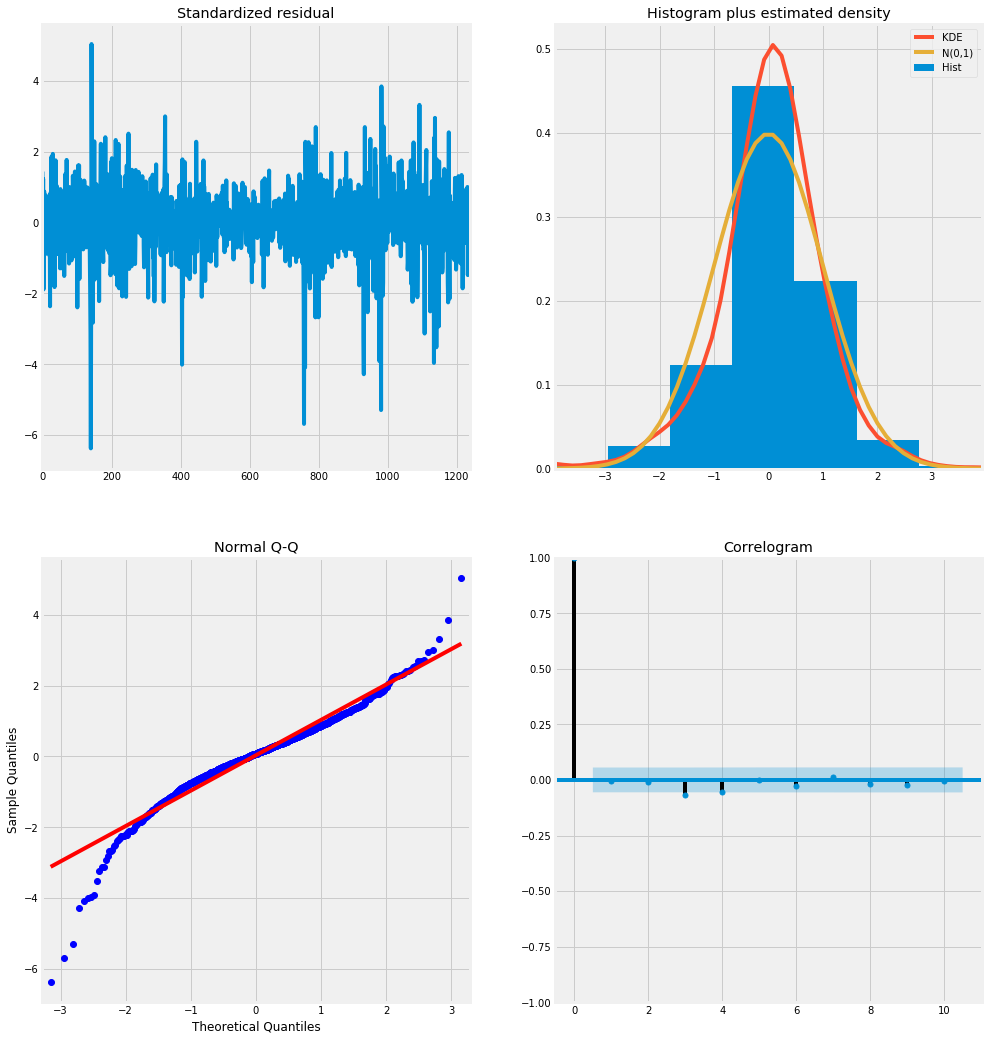

In [14]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('splvoutput.png')
plt.show()

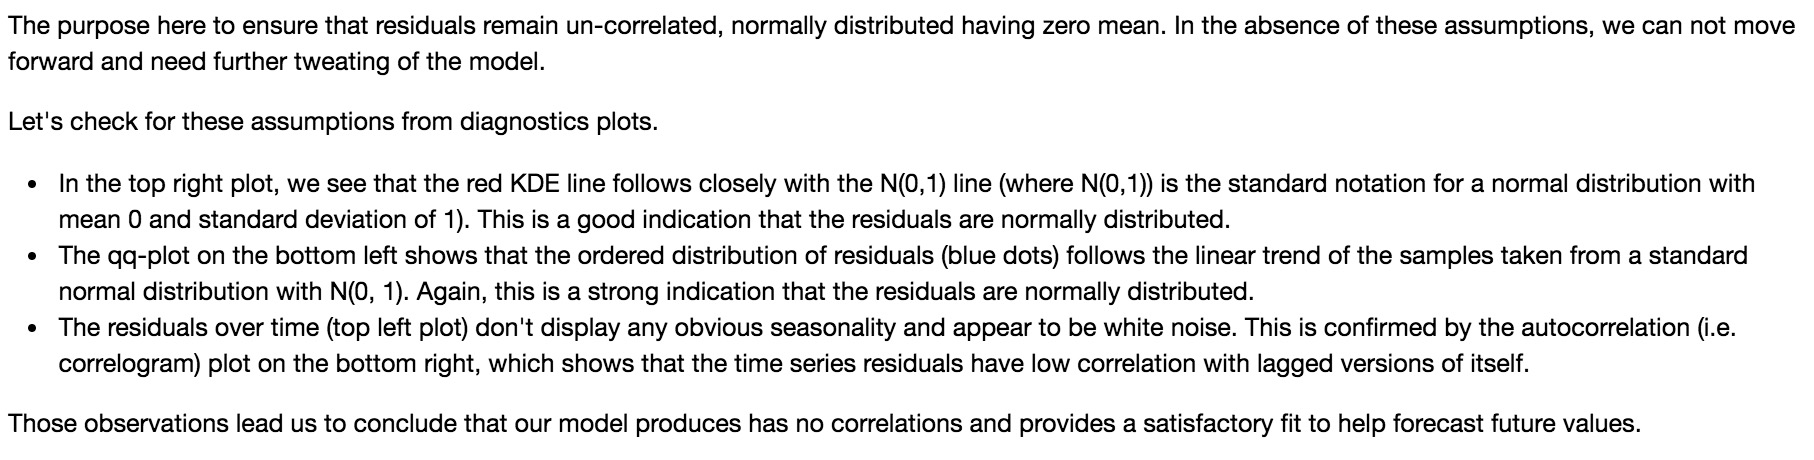

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [15]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

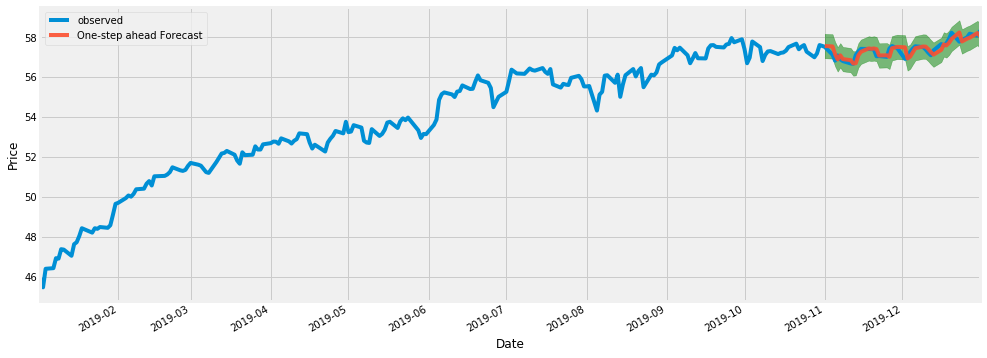

In [16]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('splvpred.png')
plt.show()

In [17]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.05


In [18]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

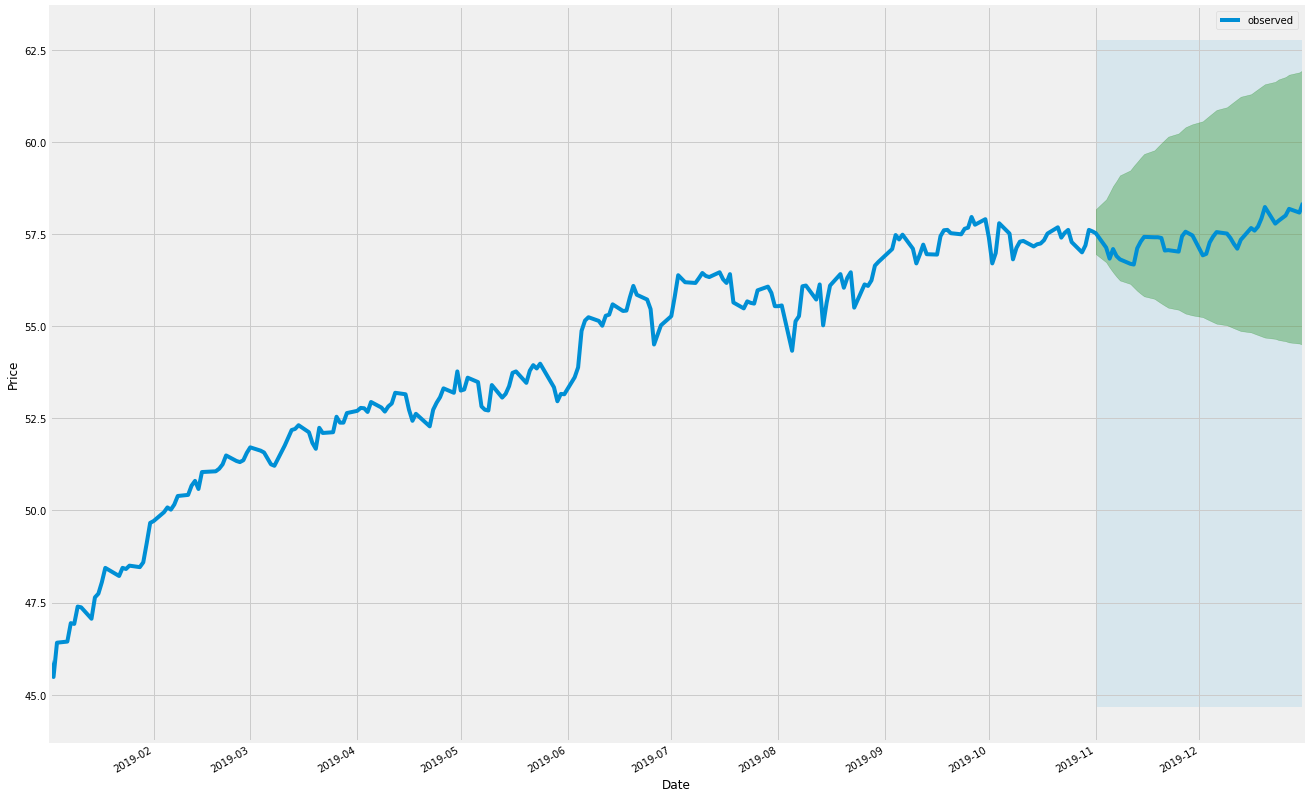

In [19]:
ax = ts['2019':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('splvpred2.png')
plt.show()

In [20]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.34


In [21]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [22]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

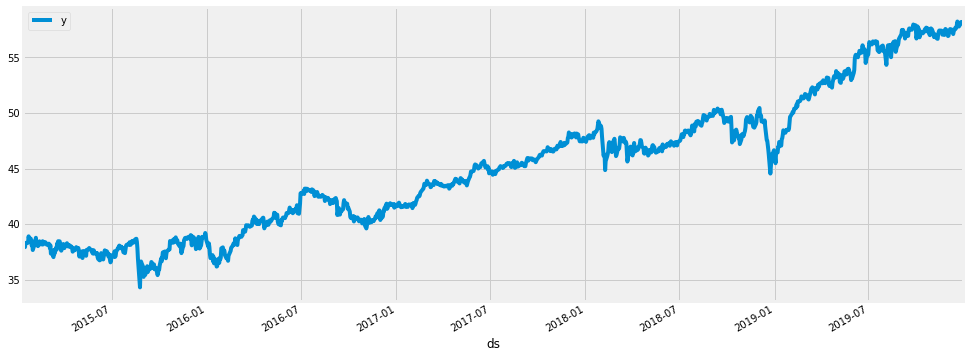

In [23]:
spy.set_index('ds').plot()

In [24]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [25]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [26]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [27]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [28]:
# pull_df

In [29]:
spy_yf = pd.read_csv('SPLV_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [30]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-04,56.914841
1,2019-11-05,56.615974
2,2019-11-06,56.874992
3,2019-11-07,56.685707
4,2019-11-08,56.596046
5,2019-11-11,56.476498
6,2019-11-12,56.456573
7,2019-11-13,56.894917
8,2019-11-14,57.074238
9,2019-11-15,57.203747


In [1]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('splv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1252])
comb = comb.drop([1255])
comb = comb.drop([1256])
comb.tail(50)

NameError: name 'spy_df_novjan' is not defined

In [7]:
comb = pd.read_csv('splv_predict_fbprophet.csv')
comb.tail(41)

,Unnamed: 0,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
20,1231,12/2/2019,58.049351,56.879377,59.126700,56.811497,-1.237854,-2.18%
21,1232,12/3/2019,58.108191,56.917074,59.258178,56.851421,-1.256770,-2.21%
22,1233,12/4/2019,58.113258,57.009610,59.295136,57.160831,-0.952427,-1.67%
23,1234,12/5/2019,58.167889,57.009785,59.345101,57.320526,-0.847363,-1.48%
24,1235,12/6/2019,58.193700,57.017558,59.239734,57.440296,-0.753404,-1.31%
25,1236,12/9/2019,58.156799,56.963821,59.349262,57.400372,-0.756427,-1.32%
26,1237,12/10/2019,58.184927,57.016605,59.413643,57.280602,-0.904325,-1.58%
27,1238,12/11/2019,58.158660,56.956557,59.281232,57.120907,-1.037753,-1.82%
28,1239,12/12/2019,58.181859,56.939248,59.294668,56.991154,-1.190705,-2.09%
29,1240,12/13/2019,58.176676,57.014055,59.325035,57.230698,-0.945978,-1.65%


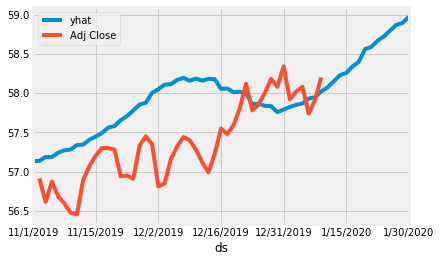

In [5]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.savefig('splv_fbproph_forecast.png')

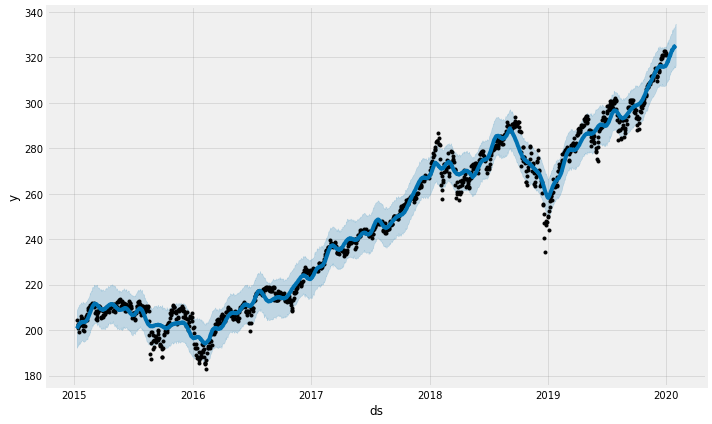

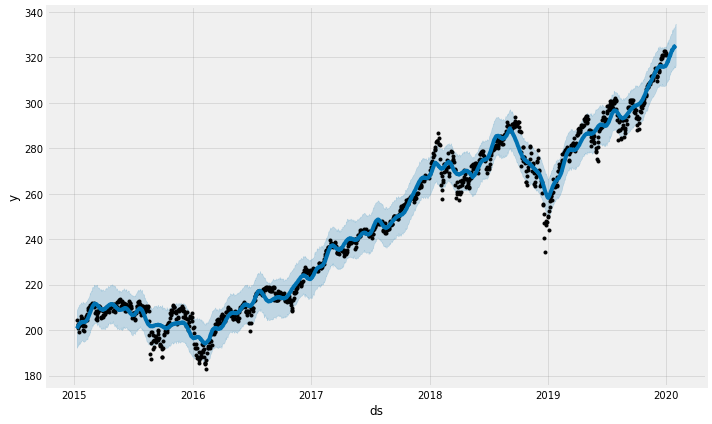

In [44]:
p.plot(df)
plt.savefig('what.png')

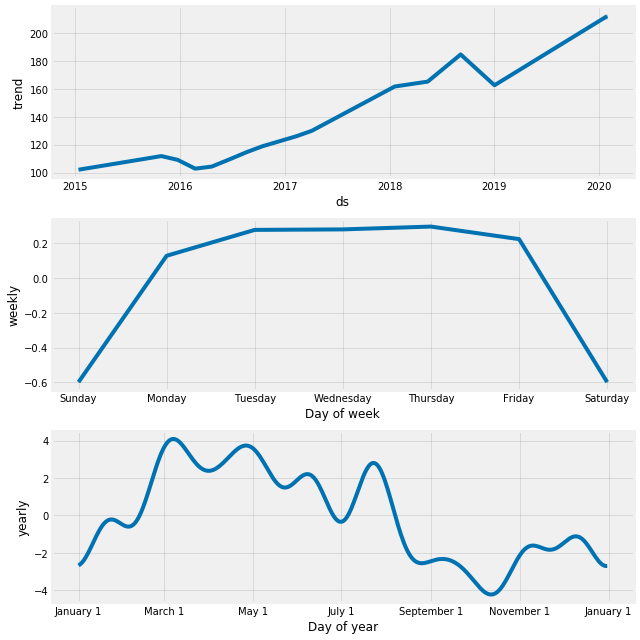

In [28]:
p.plot_components(out)
plt.savefig('qqqmovement.png')

In [29]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [30]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
pred = out[['ds', 'yhat']].set_index('ds')